In [2]:
# Kaggle 기본 예제
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
titanic_df = pd.read_csv('C:/GCP/Python/AI/ML_data/titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 데이터 정보 확인
titanic_df.info()
print('\n'+'-'*50)
titanic_df.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--------------------------------------------------


PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85          C           1
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123         S           1
7            0         1       McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46          S           1
11           1         3       Sandstrom, Miss. Marguerite Rut                      female  4.0   1      1      PP 9549   16.7000  G6           S           1
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103         S           1
                                                         

In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)

C:\Users\ktw80\AppData\Local\Temp\ipykernel_9540\1447599031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
C:\Users\ktw80\AppData\Local\Temp\ipykernel_9540\1447599031.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [6]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [7]:
# 성별에 따른 구별
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

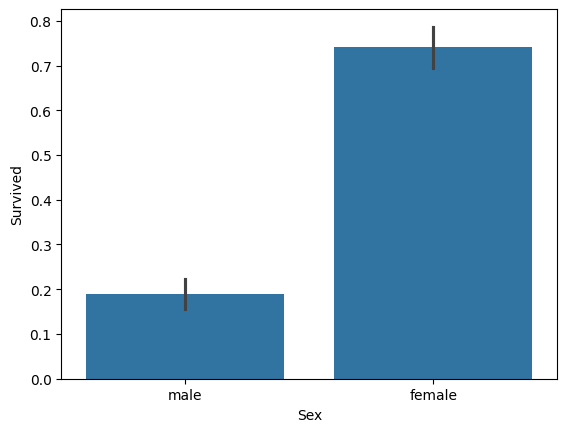

In [8]:
# 시각화
sns.barplot(x='Sex', y='Survived', data = titanic_df)
plt.show()  # 이 코드는 그래프를 화면에 표시하되, 객체 정보는 출력하지 않습니다.

In [9]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def cross_val_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(titanic_df)):
        X_train, X_test = titanic_df.values[train_index], titanic_df.values[test_index]
        y_train, y_test = titanic_df.values[train_index], titanic_df.values[test_index]

In [20]:
my_list = ['a', 'b', 'c', 'd']
for q in enumerate(my_list):
    print(q)

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')


In [ ]:
parmameters = {
    'max_depth': [2,3,5,10],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1,5,8]
}

grid_clf = GridSearchCV(clf, param_grid=parmameters, scoring='accuracy', cv=5)